In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import os
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

# Set up plotting style
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)


In [4]:
# Define data directory
data_dir = 'GAVD/data/'

# List all data files
data_files = [f for f in os.listdir(data_dir) if f.endswith('.csv') or f.endswith('.pkl')]
csv_files = [f for f in data_files if f.endswith('.csv')]
pkl_files = [f for f in data_files if f.endswith('.pkl')]

print(f"Found {len(csv_files)} CSV files and {len(pkl_files)} PKL files")
print("\nCSV files:")
for f in sorted(csv_files):
    size_mb = os.path.getsize(os.path.join(data_dir, f)) / (1024*1024)
    print(f"  {f} ({size_mb:.1f} MB)")
    
print("\nPKL files:")
for f in sorted(pkl_files):
    size_mb = os.path.getsize(os.path.join(data_dir, f)) / (1024*1024)
    print(f"  {f} ({size_mb:.1f} MB)")


Found 5 CSV files and 5 PKL files

CSV files:
  GAVD_Clinical_Annotations_1.csv (23.9 MB)
  GAVD_Clinical_Annotations_2.csv (24.2 MB)
  GAVD_Clinical_Annotations_3.csv (24.3 MB)
  GAVD_Clinical_Annotations_4.csv (24.5 MB)
  GAVD_Clinical_Annotations_5.csv (24.0 MB)

PKL files:
  GAVD_Clinical_Annotations_1.pkl (17.4 MB)
  GAVD_Clinical_Annotations_2.pkl (17.4 MB)
  GAVD_Clinical_Annotations_3.pkl (17.4 MB)
  GAVD_Clinical_Annotations_4.pkl (17.4 MB)
  GAVD_Clinical_Annotations_5.pkl (17.4 MB)


In [5]:
# Load the first CSV file to examine structure
first_csv = os.path.join(data_dir, 'GAVD_Clinical_Annotations_1.csv')
df_sample = pd.read_csv(first_csv)

print(f"Sample data shape: {df_sample.shape}")
print(f"\nColumns: {list(df_sample.columns)}")
print(f"\nData types:")
print(df_sample.dtypes)


Sample data shape: (91624, 10)

Columns: ['seq', 'frame_num', 'cam_view', 'gait_event', 'dataset', 'gait_pat', 'bbox', 'vid_info', 'id', 'url']

Data types:
seq           object
frame_num      int64
cam_view      object
gait_event    object
dataset       object
gait_pat      object
bbox          object
vid_info      object
id            object
url           object
dtype: object


In [ ]:
# Load the first CSV file to examine structure
first_csv = os.path.join(data_dir, 'GAVD_Clinical_Annotations_1.csv')
df_sample = pd.read_csv(first_csv)

print(f"Sample data shape: {df_sample.shape}")
print(f"\nColumns: {list(df_sample.columns)}")
print(f"\nData types:")
print(df_sample.dtypes)


Sample data shape: (91624, 10)

Columns: ['seq', 'frame_num', 'cam_view', 'gait_event', 'dataset', 'gait_pat', 'bbox', 'vid_info', 'id', 'url']

Data types:
seq           object
frame_num      int64
cam_view      object
gait_event    object
dataset       object
gait_pat      object
bbox          object
vid_info      object
id            object
url           object
dtype: object


In [7]:
# Display first few rows
print("First 5 rows of the dataset:")
df_sample.head()


First 5 rows of the dataset:


,seq,frame_num,cam_view,gait_event,dataset,gait_pat,bbox,vid_info,id,url
0,cljan9b4p00043n6ligceanyp,1757,right side,NaN,Abnormal Gait,parkinsons,"{'top': 125.0, 'left': 156.0, 'height': 497.0,...","{'height': 720, 'width': 1280, 'mime_type': 'v...",B5hrxKe2nP8,https://www.youtube.com/watch?v=B5hrxKe2nP8
1,cljan9b4p00043n6ligceanyp,1758,right side,NaN,Abnormal Gait,parkinsons,"{'top': 124.97368421052632, 'left': 155.789473...","{'height': 720, 'width': 1280, 'mime_type': 'v...",B5hrxKe2nP8,https://www.youtube.com/watch?v=B5hrxKe2nP8
2,cljan9b4p00043n6ligceanyp,1759,right side,NaN,Abnormal Gait,parkinsons,"{'top': 124.94736842105263, 'left': 155.578947...","{'height': 720, 'width': 1280, 'mime_type': 'v...",B5hrxKe2nP8,https://www.youtube.com/watch?v=B5hrxKe2nP8
3,cljan9b4p00043n6ligceanyp,1760,right side,NaN,Abnormal Gait,parkinsons,"{'top': 124.92105263157895, 'left': 155.368421...","{'height': 720, 'width': 1280, 'mime_type': 'v...",B5hrxKe2nP8,https://www.youtube.com/watch?v=B5hrxKe2nP8
4,cljan9b4p00043n6ligceanyp,1761,right side,NaN,Abnormal Gait,parkinsons,"{'top': 124.89473684210526, 'left': 155.157894...","{'height': 720, 'width': 1280, 'mime_type': 'v...",B5hrxKe2nP8,https://www.youtube.com/watch?v=B5hrxKe2nP8


In [ ]:
# print the bbox field
# Get a sample bbox and print its full content
sample_bbox = df_sample.iloc[1]['bbox']
print("Sample bounding box content:")
print(sample_bbox)



Sample bounding box content:
{'top': 124.97368421052632, 'left': 155.78947368421052, 'height': 497.3684210526316, 'width': 229.0263157894737}

Window dimensions:
Width: 229.0
Height: 497.4


In [8]:
# Check for missing values
print("Missing values per column:")
missing_data = df_sample.isnull().sum()
missing_percent = (missing_data / len(df_sample)) * 100
missing_df = pd.DataFrame({
    'Missing Count': missing_data,
    'Percentage': missing_percent
})
print(missing_df[missing_df['Missing Count'] > 0])


Missing values per column:
            Missing Count  Percentage
cam_view              232    0.253209
gait_event          90866   99.172706


In [9]:
# Unique values in key categorical columns
categorical_cols = ['cam_view', 'gait_event', 'dataset', 'gait_pat']

for col in categorical_cols:
    if col in df_sample.columns:
        unique_vals = df_sample[col].unique()
        print(f"\n{col.upper()} - Unique values ({len(unique_vals)}):")
        if len(unique_vals) <= 20:  # Show all if not too many
            for val in sorted(unique_vals, key=str):
                count = (df_sample[col] == val).sum()
                print(f"  {val}: {count} samples")
        else:
            print(f"  Too many unique values to display ({len(unique_vals)})")
            print(f"  Sample values: {list(unique_vals[:10])}")



CAM_VIEW - Unique values (5):
  back: 23523 samples
  front: 26387 samples
  left side: 18000 samples
  nan: 0 samples
  right side: 23482 samples

GAIT_EVENT - Unique values (6):
  Left foot flat: 2 samples
  Left initial contact: 368 samples
  Left tibia vertical: 3 samples
  Left toe off: 2 samples
  Right initial contact: 383 samples
  nan: 0 samples

DATASET - Unique values (1):
  Abnormal Gait: 91624 samples

GAIT_PAT - Unique values (11):
  abnormal: 51031 samples
  antalgic: 975 samples
  cerebral palsy: 5546 samples
  exercise: 5492 samples
  inebriated: 1936 samples
  myopathic: 8871 samples
  normal: 2598 samples
  parkinsons: 1609 samples
  prosthetic: 1208 samples
  stroke: 3609 samples
  style: 8749 samples


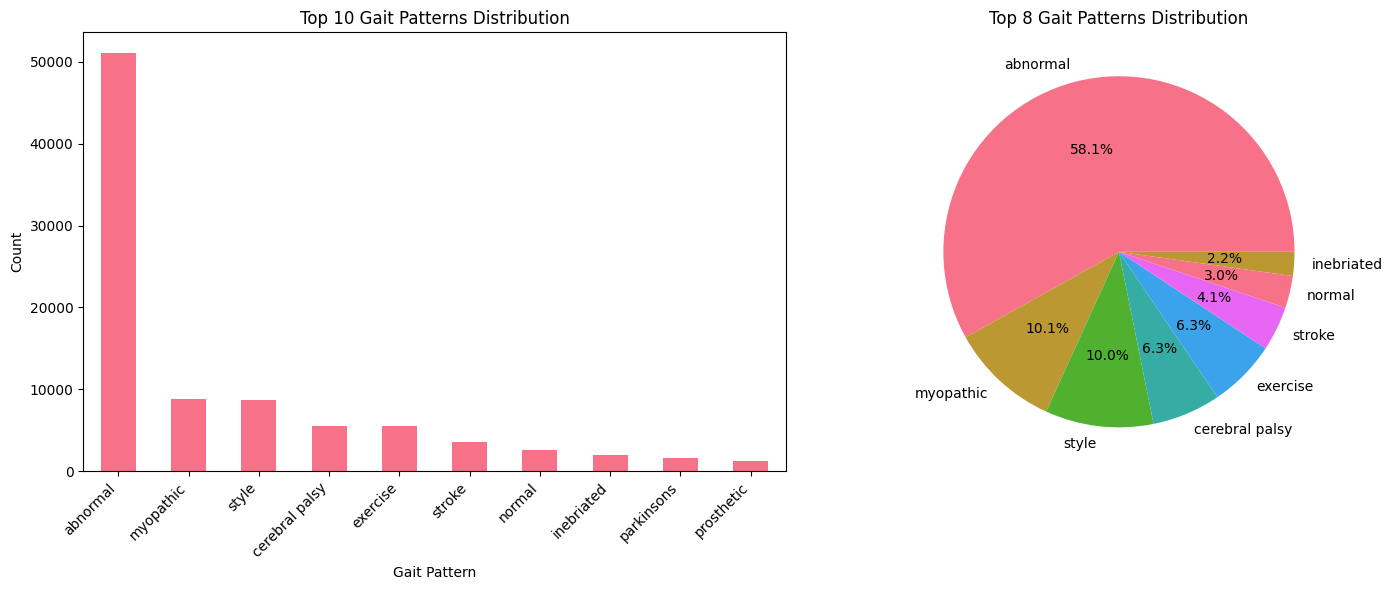

Total unique gait patterns: 11


In [10]:
# Plot distribution of gait patterns
if 'gait_pat' in df_sample.columns:
    plt.figure(figsize=(15, 6))
    gait_counts = df_sample['gait_pat'].value_counts()
    
    plt.subplot(1, 2, 1)
    gait_counts.head(10).plot(kind='bar')
    plt.title('Top 10 Gait Patterns Distribution')
    plt.xlabel('Gait Pattern')
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    
    plt.subplot(1, 2, 2)
    plt.pie(gait_counts.head(8), labels=gait_counts.head(8).index, autopct='%1.1f%%')
    plt.title('Top 8 Gait Patterns Distribution')
    
    plt.tight_layout()
    plt.show()
    
    print(f"Total unique gait patterns: {len(gait_counts)}")


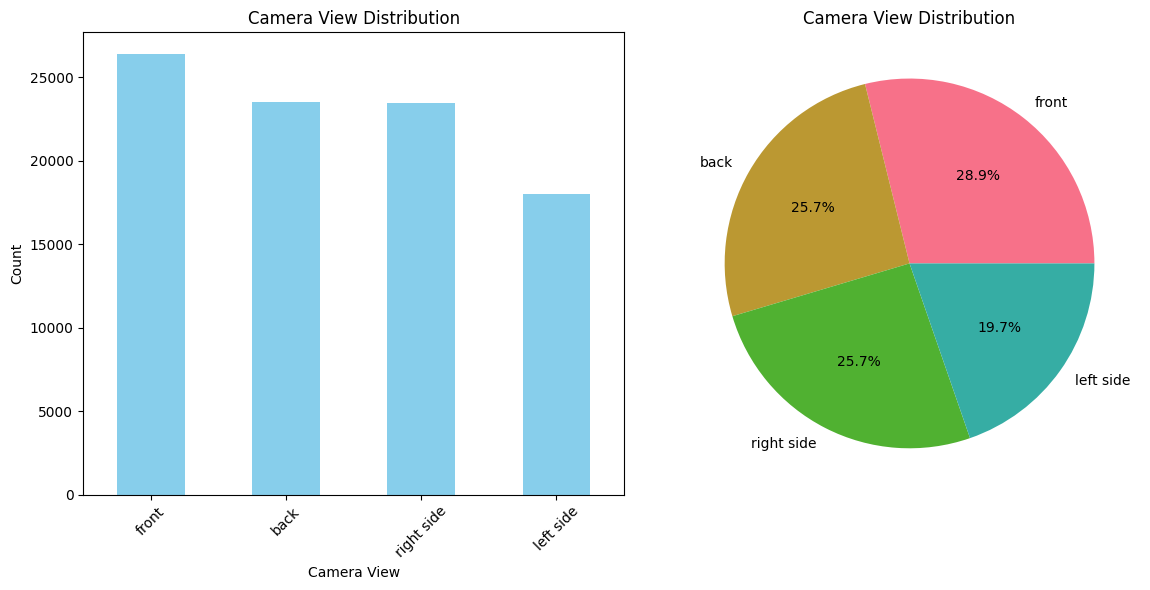

In [11]:
# Plot camera view distribution
if 'cam_view' in df_sample.columns:
    plt.figure(figsize=(12, 6))
    cam_counts = df_sample['cam_view'].value_counts()
    
    plt.subplot(1, 2, 1)
    cam_counts.plot(kind='bar', color='skyblue')
    plt.title('Camera View Distribution')
    plt.xlabel('Camera View')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    
    plt.subplot(1, 2, 2)
    plt.pie(cam_counts, labels=cam_counts.index, autopct='%1.1f%%')
    plt.title('Camera View Distribution')
    
    plt.tight_layout()
    plt.show()


Sequence Analysis:
  Total unique sequences: 374
  Total frames: 91,624
  Average frames per sequence: 245.0


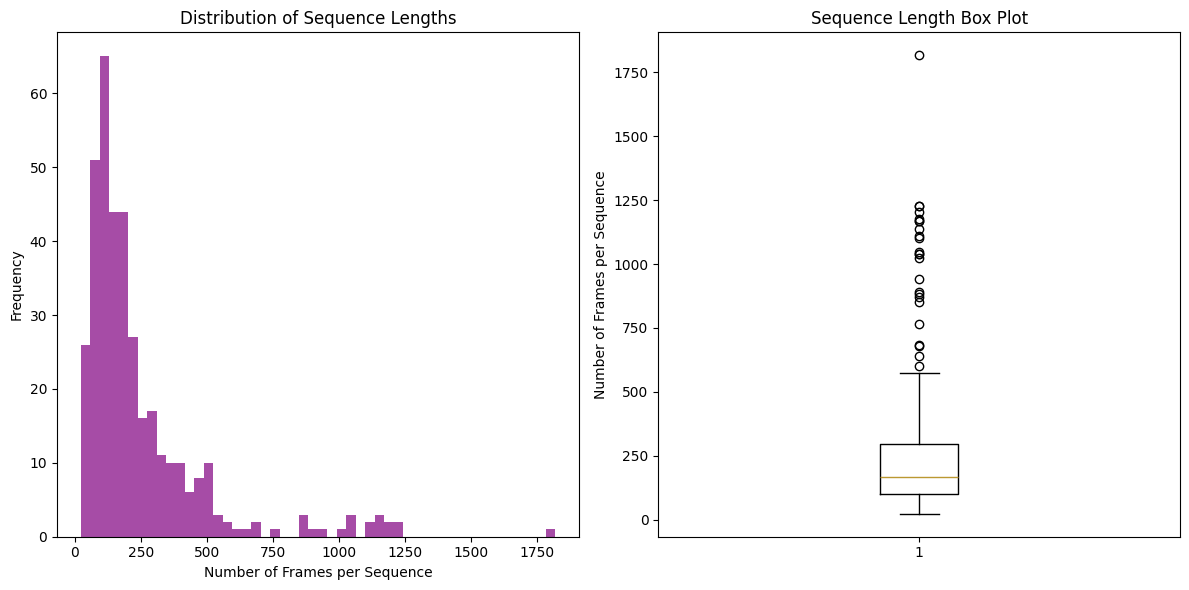


Sequence length statistics:
  Min: 23 frames
  Max: 1817 frames
  Median: 167.0 frames
  Mean: 245.0 frames
  Std: 244.2 frames


In [12]:
# Analyze sequence information
if 'seq' in df_sample.columns:
    unique_sequences = df_sample['seq'].nunique()
    total_frames = len(df_sample)
    avg_frames_per_seq = total_frames / unique_sequences
    
    print(f"Sequence Analysis:")
    print(f"  Total unique sequences: {unique_sequences:,}")
    print(f"  Total frames: {total_frames:,}")
    print(f"  Average frames per sequence: {avg_frames_per_seq:.1f}")
    
    # Plot sequence length distribution
    seq_lengths = df_sample.groupby('seq').size()
    
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.hist(seq_lengths, bins=50, alpha=0.7, color='purple')
    plt.title('Distribution of Sequence Lengths')
    plt.xlabel('Number of Frames per Sequence')
    plt.ylabel('Frequency')
    
    plt.subplot(1, 2, 2)
    plt.boxplot(seq_lengths)
    plt.title('Sequence Length Box Plot')
    plt.ylabel('Number of Frames per Sequence')
    
    plt.tight_layout()
    plt.show()
    
    print(f"\nSequence length statistics:")
    print(f"  Min: {seq_lengths.min()} frames")
    print(f"  Max: {seq_lengths.max()} frames")
    print(f"  Median: {seq_lengths.median():.1f} frames")
    print(f"  Mean: {seq_lengths.mean():.1f} frames")
    print(f"  Std: {seq_lengths.std():.1f} frames")


In [13]:
# Load all CSV files to get complete dataset statistics
print("Loading all dataset parts...")
all_dfs = []

for i in range(1, 6):  # Parts 1-5
    filename = f'GAVD_Clinical_Annotations_{i}.csv'
    filepath = os.path.join(data_dir, filename)
    if os.path.exists(filepath):
        print(f"Loading {filename}...")
        df_part = pd.read_csv(filepath)
        all_dfs.append(df_part)
        print(f"  Shape: {df_part.shape}")

# Combine all parts
if all_dfs:
    df_complete = pd.concat(all_dfs, ignore_index=True)
    print(f"\nComplete dataset shape: {df_complete.shape}")
    print(f"Total unique sequences: {df_complete['seq'].nunique() if 'seq' in df_complete.columns else 'N/A'}")
    print(f"Total unique videos: {df_complete['id'].nunique() if 'id' in df_complete.columns else 'N/A'}")
else:
    print("No CSV files found to combine.")


Loading all dataset parts...
Loading GAVD_Clinical_Annotations_1.csv...
  Shape: (91624, 10)
Loading GAVD_Clinical_Annotations_2.csv...
  Shape: (91623, 10)
Loading GAVD_Clinical_Annotations_3.csv...
  Shape: (91623, 10)
Loading GAVD_Clinical_Annotations_4.csv...
  Shape: (91623, 10)
Loading GAVD_Clinical_Annotations_5.csv...
  Shape: (91623, 10)

Complete dataset shape: (458116, 10)
Total unique sequences: 1874
Total unique videos: 348


In [14]:
# Final summary
if 'df_complete' in locals():
    print("=" * 60)
    print("GAVD DATASET SUMMARY")
    print("=" * 60)
    print(f"Total annotations: {len(df_complete):,}")
    print(f"Total unique sequences: {df_complete['seq'].nunique():,}" if 'seq' in df_complete.columns else "Sequences: N/A")
    print(f"Total unique videos: {df_complete['id'].nunique():,}" if 'id' in df_complete.columns else "Videos: N/A")
    
    if 'dataset' in df_complete.columns:
        dataset_dist = df_complete['dataset'].value_counts()
        print(f"\nDataset Distribution:")
        for category, count in dataset_dist.items():
            print(f"  {category}: {count:,} ({count/len(df_complete)*100:.1f}%)")
    
    if 'gait_pat' in df_complete.columns:
        gait_patterns = df_complete['gait_pat'].nunique()
        print(f"\nTotal unique gait patterns: {gait_patterns:,}")
        
    if 'cam_view' in df_complete.columns:
        cam_views = df_complete['cam_view'].nunique()
        print(f"Total unique camera views: {cam_views:,}")
        
    print("\nDataset is ready for analysis!")
    print("=" * 60)
else:
    print("Using sample data for summary:")
    print(f"Sample size: {len(df_sample):,} annotations")


GAVD DATASET SUMMARY
Total annotations: 458,116
Total unique sequences: 1,874
Total unique videos: 348

Dataset Distribution:
  Abnormal Gait: 422,141 (92.1%)
  Normal Gait: 35,975 (7.9%)

Total unique gait patterns: 12
Total unique camera views: 5

Dataset is ready for analysis!


In [15]:
def get_sequence_data(sequence_id, dataframe=None):
    """
    Retrieve all data rows for a given sequence ID.
    
    Parameters:
    -----------
    sequence_id : str
        The sequence ID to search for
    dataframe : pd.DataFrame, optional
        The dataframe to search in. If None, uses df_complete if available
        
    Returns:
    --------
    pd.DataFrame
        All rows matching the sequence ID, sorted by frame_num
    """
    # Use the complete dataset if available, otherwise use the sample
    if dataframe is None:
        if 'df_complete' in globals():
            dataframe = df_complete
        elif 'df_sample' in globals():
            dataframe = df_sample
        else:
            raise ValueError("No dataframe available. Please load the data first.")
    
    # Filter data by sequence ID
    sequence_data = dataframe[dataframe['seq'] == sequence_id].copy()
    
    if sequence_data.empty:
        print(f"No data found for sequence ID: {sequence_id}")
        return pd.DataFrame()
    
    # Sort by frame number for chronological order
    sequence_data = sequence_data.sort_values('frame_num').reset_index(drop=True)
    
    print(f"Found {len(sequence_data)} frames for sequence: {sequence_id}")
    print(f"Frame range: {sequence_data['frame_num'].min()} - {sequence_data['frame_num'].max()}")
    
    if 'gait_pat' in sequence_data.columns:
        gait_pattern = sequence_data['gait_pat'].iloc[0]
        print(f"Gait pattern: {gait_pattern}")
    
    if 'cam_view' in sequence_data.columns:
        cam_view = sequence_data['cam_view'].iloc[0]
        print(f"Camera view: {cam_view}")
    
    if 'url' in sequence_data.columns:
        video_url = sequence_data['url'].iloc[0]
        print(f"Video URL: {video_url}")
    
    return sequence_data


In [22]:
# Example usage: Retrieve data for the sequence ID from your example
example_sequence_id = "cljr5vg0s001s3n6lvxtmt0rn"
sequence_data = get_sequence_data(example_sequence_id)

# Display first 5 rows
print("\nFirst 5 rows of the sequence:")
print(sequence_data.head())


Found 121 frames for sequence: cljr5vg0s001s3n6lvxtmt0rn
Frame range: 280 - 400
Gait pattern: myopathic
Camera view: front
Video URL: https://www.youtube.com/watch?v=8PPLTf0fZsY

First 5 rows of the sequence:
                         seq  frame_num cam_view gait_event        dataset  \
0  cljr5vg0s001s3n6lvxtmt0rn        280    front        NaN  Abnormal Gait   
1  cljr5vg0s001s3n6lvxtmt0rn        281    front        NaN  Abnormal Gait   
2  cljr5vg0s001s3n6lvxtmt0rn        282    front        NaN  Abnormal Gait   
3  cljr5vg0s001s3n6lvxtmt0rn        283    front        NaN  Abnormal Gait   
4  cljr5vg0s001s3n6lvxtmt0rn        284    front        NaN  Abnormal Gait   

    gait_pat                                               bbox  \
0  myopathic  {'top': 188.0, 'left': 420.0, 'height': 226.0,...   
1  myopathic  {'top': 187.1875, 'left': 419.6875, 'height': ...   
2  myopathic  {'top': 186.375, 'left': 419.375, 'height': 22...   
3  myopathic  {'top': 185.5625, 'left': 419.0625, 'hei

In [17]:
# Additional utility function to search for sequences by gait pattern
def find_sequences_by_pattern(gait_pattern, max_results=10, dataframe=None):
    """
    Find sequence IDs that match a specific gait pattern.
    
    Parameters:
    -----------
    gait_pattern : str
        The gait pattern to search for (e.g., 'parkinsons', 'normal', etc.)
    max_results : int
        Maximum number of unique sequences to return
    dataframe : pd.DataFrame, optional
        The dataframe to search in. If None, uses df_complete if available
        
    Returns:
    --------
    list
        List of unique sequence IDs matching the gait pattern
    """
    # Use the complete dataset if available, otherwise use the sample
    if dataframe is None:
        if 'df_complete' in globals():
            dataframe = df_complete
        elif 'df_sample' in globals():
            dataframe = df_sample
        else:
            raise ValueError("No dataframe available. Please load the data first.")
    
    # Filter by gait pattern and get unique sequences
    matching_sequences = dataframe[dataframe['gait_pat'] == gait_pattern]['seq'].unique()
    
    print(f"Found {len(matching_sequences)} sequences with gait pattern '{gait_pattern}'")
    
    # Return limited results
    result_sequences = matching_sequences[:max_results].tolist()
    
    if len(matching_sequences) > max_results:
        print(f"Showing first {max_results} sequences (out of {len(matching_sequences)} total)")
    
    return result_sequences

# Example: Find sequences with Parkinson's gait pattern
print("Finding sequences with 'parkinsons' gait pattern:")
parkinson_sequences = find_sequences_by_pattern('parkinsons', max_results=5)
print("Sequence IDs:", parkinson_sequences)


Finding sequences with 'parkinsons' gait pattern:
Found 47 sequences with gait pattern 'parkinsons'
Showing first 5 sequences (out of 47 total)
Sequence IDs: ['cljan9b4p00043n6ligceanyp', 'cljanb45y00083n6lmh1qhydd', 'cljnyzwbo00043n6lugyldlhu', 'cljnz3l34000c3n6ldapq560j', 'cljnz4e8u000g3n6l1luikppo']
